# OVERVIEW
I have always loved playing soccer as well as watching it with my family and friends. The most fun time to watch the games is when their is a big tournament going on. My father, brother, and myself try to predict the outcomes of these tornaments based off of how the players perfom the rest of the year so I thought why not do an actual predictive analysis on who is going to win the 2024 Euros and make my prediction based off of the performances of european teams at the 2020 Euros and the 2022 World Cup. I used data such as goals socred and shots taken to determine who the highest performing teams were and atempt to find a winner out of that pool of teams.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
from scipy.stats import pearsonr, spearmanr

In [49]:
import statsmodels.api as sm

In [2]:
euros_20 = pd.read_csv('eurocup_2020_results.csv')
world_cup_22 = pd.read_csv('Fifa_world_cup_matches.csv')

In [3]:
euros_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   stage                 51 non-null     object 
 1   date                  51 non-null     object 
 2   pens                  51 non-null     bool   
 3   pens_home_score       51 non-null     object 
 4   pens_away_score       51 non-null     object 
 5   team_name_home        51 non-null     object 
 6   team_name_away        51 non-null     object 
 7   team_home_score       51 non-null     int64  
 8   team_away_score       51 non-null     int64  
 9   possession_home       51 non-null     object 
 10  possession_away       51 non-null     object 
 11  total_shots_home      51 non-null     int64  
 12  total_shots_away      51 non-null     int64  
 13  shots_on_target_home  51 non-null     int64  
 14  shots_on_target_away  51 non-null     int64  
 15  Unnamed: 15           0 n

Remove Unnamed columns.

Data Dictionary:<br>
Stage: The stage of the tournament that the game takes place such as a quarter or semi final (Object)<br>
Date: Date the game was palayed on (Object)<br>
Pens: Whether or not the game went into a penalty shoot out (Boolean)<br>
Pens_home_score: The home team's score in a penalty shootout (Object)<br>
pens_away_score: The away team's score in a penalty shootout (Object)<br>
team_name_home: Home team's name (Object)<br>
team_name_away: Away teams' name (Object)<br>
team_home_score: Home team's score (Integer)<br>
team_away_score: Away team's score (Integer)<br>
possession_home: How much the home team is the one with the ball (Object)<br>
possession_away: How much the away team is the one with the ball (Object)<br>
total_shots_home: Number of shots the home team took (Integer)<br>
total_shots_away: Number of shots the away team took (Integer)<br>
shots_on_target_home: Number of shots the home team took that were either scored or forced the opposing goalie to make a save (Integer)<br>
shots_on_target_away: Number of shots the away team took that were either scored or forced the opposing goalie to make a save (Integer)<br>

In [4]:
euros_20.drop(columns=['Unnamed: 15'], inplace=True)
euros_20.drop(columns=['Unnamed: 16'], inplace=True)

In [11]:
euros_20.head(7)

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away
0,Final,11.07.2021,True,3,2,Italy,England,1,1,66%,34%,19,6,6,2
1,Semi-finals,07.07.2021,False,FALSE,FALSE,England,Denmark,2,1,59%,41%,20,6,10,3
2,Semi-finals,06.07.2021,True,4,2,Italy,Spain,1,1,29%,71%,7,16,4,5
3,Quarter-finals,03.07.2021,False,FALSE,FALSE,Ukraine,England,0,4,48%,52%,7,10,2,6
4,Quarter-finals,03.07.2021,False,FALSE,FALSE,Czech Republic,Denmark,1,2,56%,44%,16,11,5,7
5,Quarter-finals,02.07.2021,False,FALSE,FALSE,Belgium,Italy,1,2,46%,54%,10,14,4,3
6,Quarter-finals,02.07.2021,True,1,3,Switzerland,Spain,1,1,27%,73%,8,28,2,10


Text(0.5, 1.0, 'Density of Countries Home Attempts')

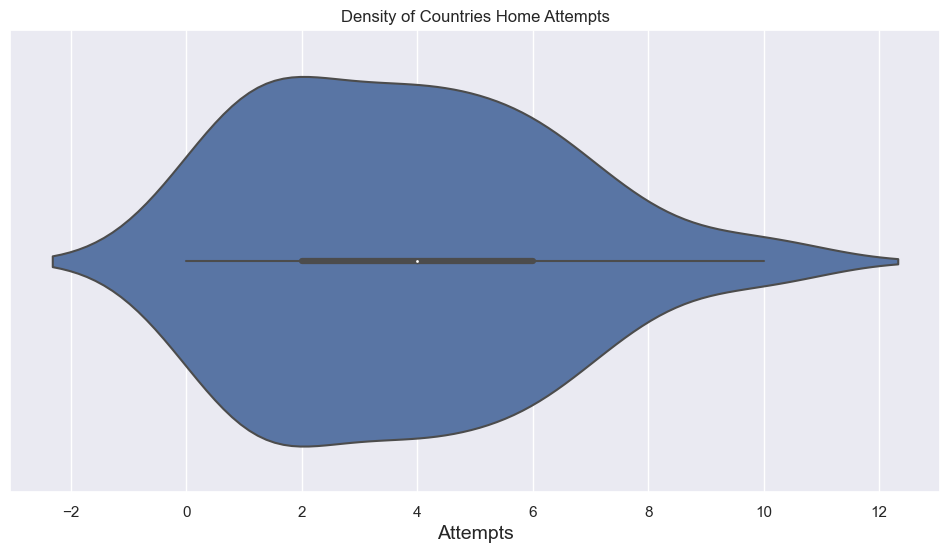

In [27]:
plt.figure(figsize=(12,6))

sns.violinplot(x=euros_20['shots_on_target_home'])

plt.xlabel("Attempts", fontsize=14)
plt.title("Density of Countries Home Attempts")

Text(0.5, 1.0, 'Density of Countries Away Attempts')

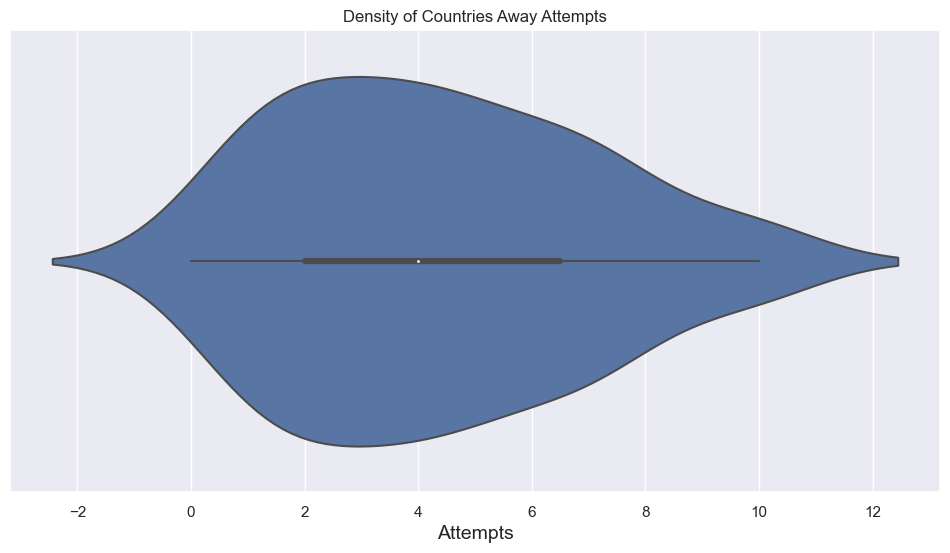

In [28]:
plt.figure(figsize=(12,6))

sns.violinplot(x=euros_20['shots_on_target_away'])

plt.xlabel("Attempts", fontsize=14)
plt.title("Density of Countries Away Attempts")

Text(0.5, 1.0, 'Density of Countries Home Goals')

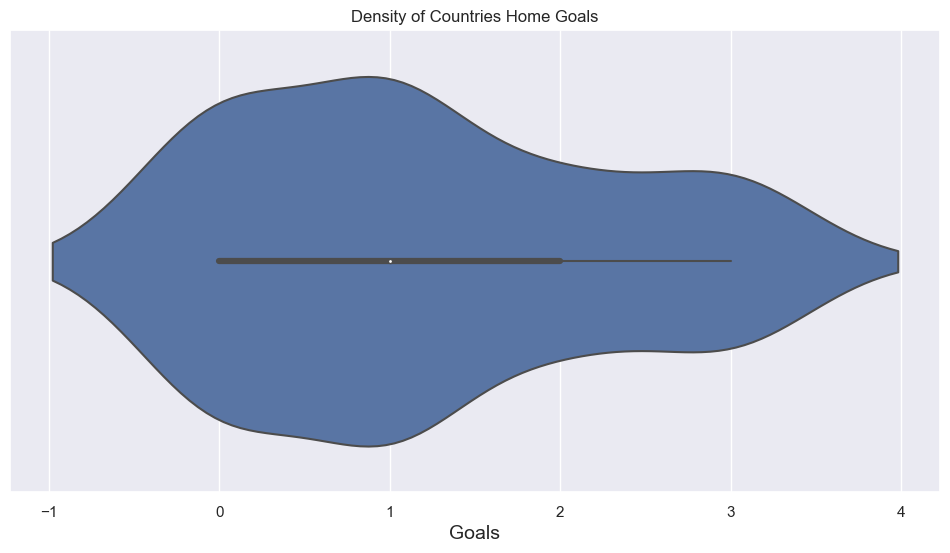

In [29]:
plt.figure(figsize=(12,6))

sns.violinplot(x=euros_20['team_home_score'])

plt.xlabel("Goals", fontsize=14)
plt.title("Density of Countries Home Goals")

Text(0.5, 1.0, 'Density of Countries Away Goals')

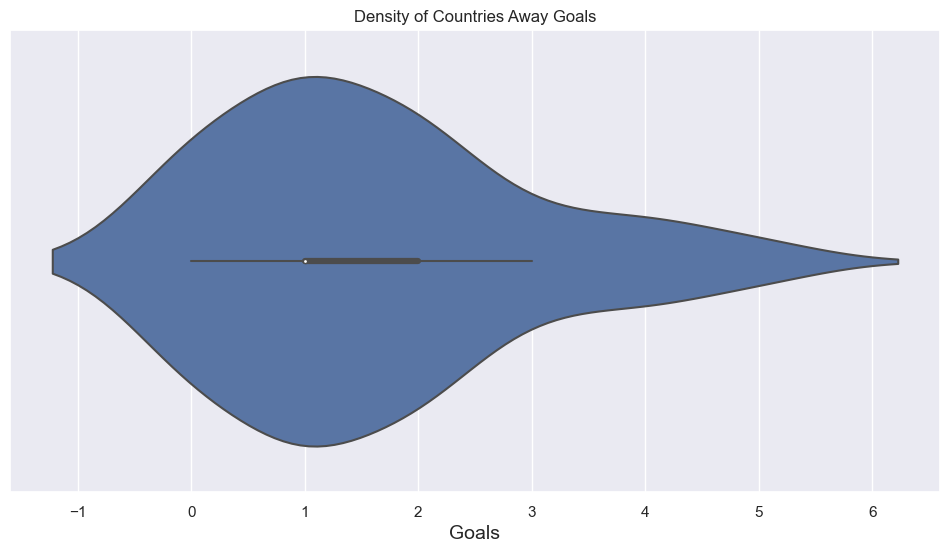

In [30]:
plt.figure(figsize=(12,6))

sns.violinplot(x=euros_20['team_away_score'])

plt.xlabel("Goals", fontsize=14)
plt.title("Density of Countries Away Goals")

Text(0.5, 1.0, 'Home Team Goals')

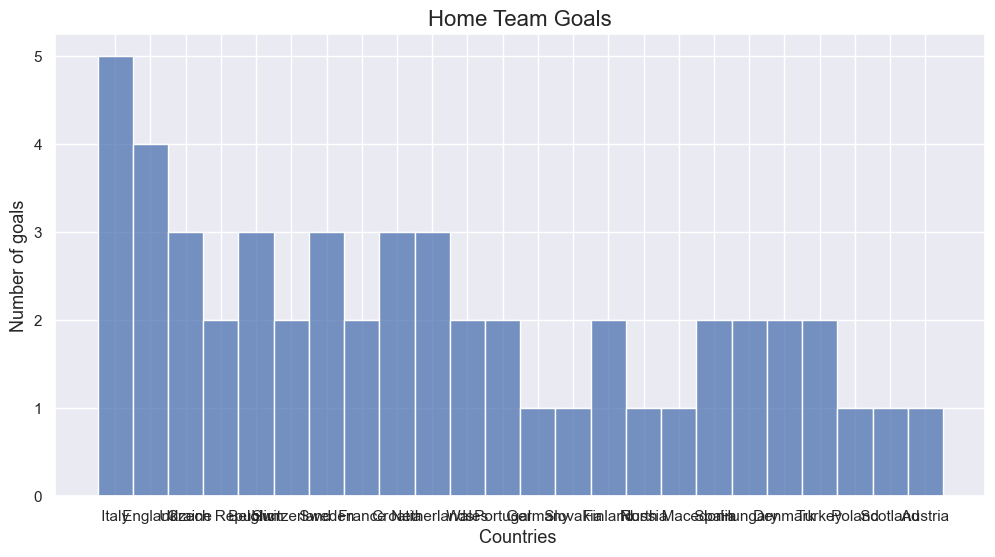

In [31]:
plt.figure(figsize=(12,6))

ax = sns.histplot(data=euros_20, x='team_name_home', bins=20)

plt.xlabel("Countries ", fontsize=13)
plt.ylabel("Number of goals", fontsize=13)
plt.title("Home Team Goals", fontsize=16)

Text(0.5, 1.0, 'Away Team Goals')

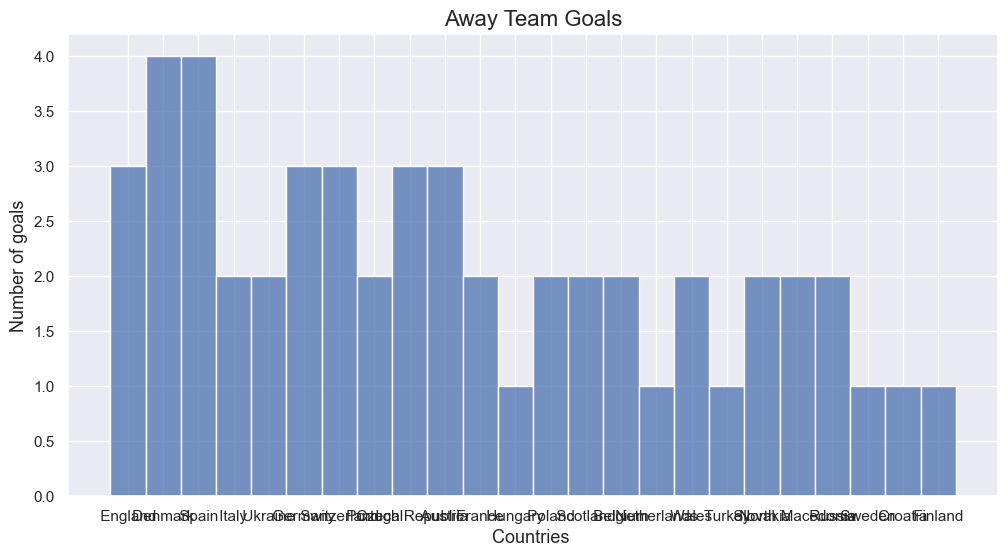

In [32]:
plt.figure(figsize=(12,6))

ax = sns.histplot(data=euros_20, x='team_name_away', bins=20)

plt.xlabel("Countries ", fontsize=13)
plt.ylabel("Number of goals", fontsize=13)
plt.title("Away Team Goals", fontsize=16)

In [35]:
euros_20['team_name_home'].groupby(euros_20['team_home_score']).describe()

,count,unique,top,freq
team_home_score,,,,
0,16,13,Ukraine,2
1,18,14,Italy,3
2,8,6,England,2
3,9,8,Croatia,2


In [37]:
euros_20['team_name_away'].groupby(euros_20['team_away_score']).describe()

,count,unique,top,freq
team_away_score,,,,
0,11,10,Germany,2
1,17,13,England,2
2,13,10,Ukraine,2
3,4,4,Switzerland,1
4,4,3,Denmark,2
5,2,1,Spain,2


In [42]:
spearmanr(euros_20['team_name_home'], euros_20['team_home_score'])

C:\Users\Isaac\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


SpearmanrResult(correlation=-0.24308284544755832, pvalue=0.08564930939934134)

In [43]:
spearmanr(euros_20['team_name_away'], euros_20['team_away_score'])

SpearmanrResult(correlation=-0.06504936035444475, pvalue=0.6501818512243518)

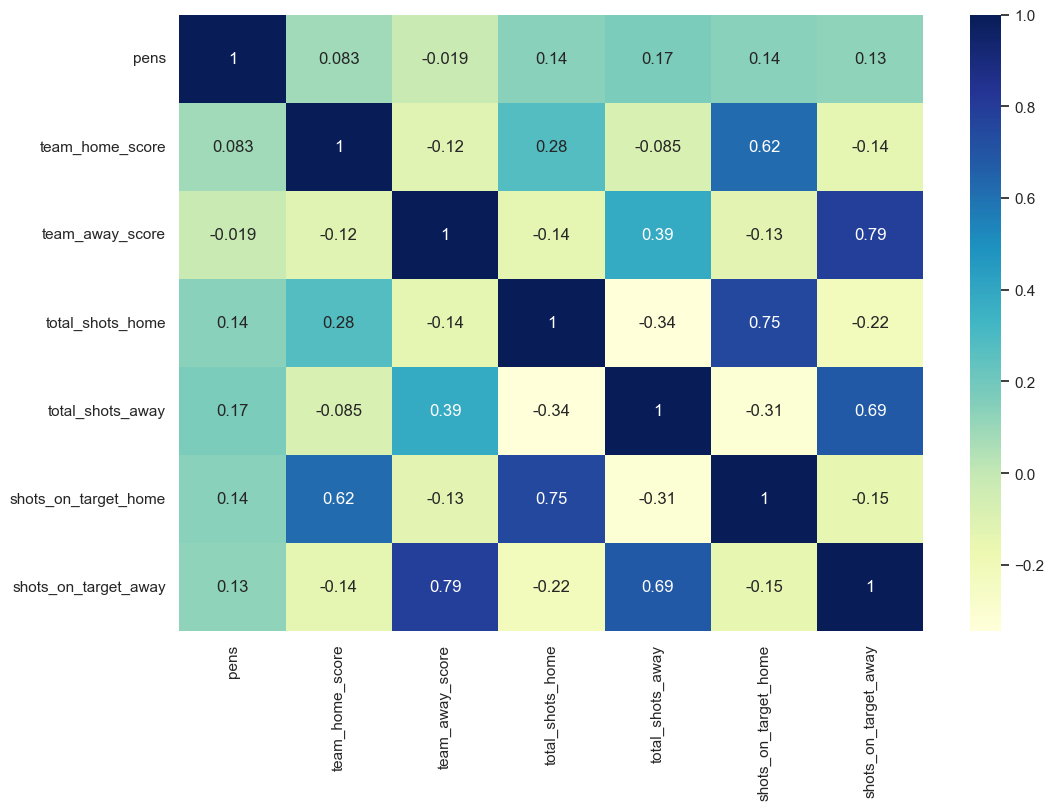

In [48]:
plt.figure(figsize=(12,8))

ax = sns.heatmap(euros_20.corr(), annot=True, cmap='YlGnBu')

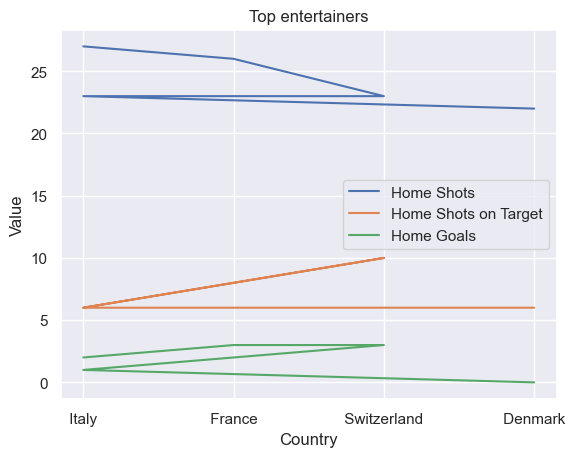

In [61]:
import matplotlib.pyplot as plt

# Sort the DataFrame by multiple columns and select the top 5 rows
top_5 = euros_20.sort_values(['total_shots_home', 'shots_on_target_home', 'team_home_score'], ascending=False).head(5)

# Create the line chart with multiple lines

plt.plot(top_5['team_name_home'], top_5['total_shots_home'], label='Home Shots')
plt.plot(top_5['team_name_home'], top_5['shots_on_target_home'], label='Home Shots on Target')
plt.plot(top_5['team_name_home'], top_5['team_home_score'], label='Home Goals')

# Customize the plot
plt.title('Top entertainers')
plt.xlabel('Country')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

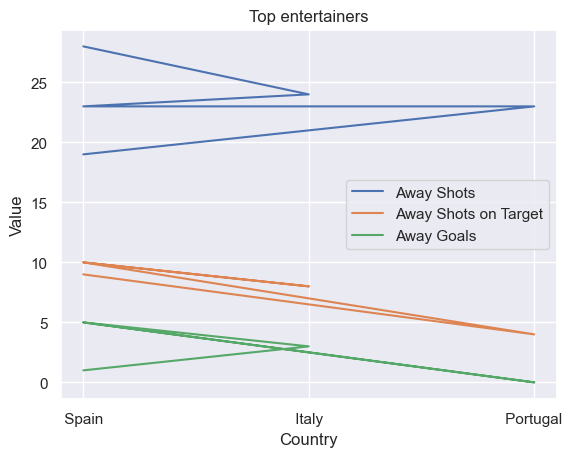

In [76]:
import matplotlib.pyplot as plt

# Sort the DataFrame by multiple columns and select the top 5 rows
top_5 = euros_20.sort_values(['total_shots_away', 'shots_on_target_away', 'team_away_score'], ascending=False).head(5)

# Create the line chart with multiple lines

plt.plot(top_5['team_name_away'], top_5['total_shots_away'], label='Away Shots')
plt.plot(top_5['team_name_away'], top_5['shots_on_target_away'], label='Away Shots on Target')
plt.plot(top_5['team_name_away'], top_5['team_away_score'], label='Away Goals')

# Customize the plot
plt.title('Top entertainers')
plt.xlabel('Country')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

In [66]:
y = euros_20['shots_on_target_home']
x1 = euros_20[['team_home_score']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     shots_on_target_home   R-squared:                       0.384
Model:                              OLS   Adj. R-squared:                  0.371
Method:                   Least Squares   F-statistic:                     30.52
Date:                  Wed, 31 May 2023   Prob (F-statistic):           1.25e-06
Time:                          10:55:19   Log-Likelihood:                -107.17
No. Observations:                    51   AIC:                             218.3
Df Residuals:                        49   BIC:                             222.2
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.0530      0.425      4.834      0.000       1.200       2.906
team_home_score     1.4639      0.265      5.525      0.000       0.931       1.996
==============================================================================
Omnibus:                        3.293   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                3.160
Skew:                           0.575   Prob(JB):                        0.206
Kurtosis:                       2.597   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
y = euros_20['shots_on_target_away']
x1 = euros_20[['team_away_score']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     shots_on_target_away   R-squared:                       0.624
Model:                              OLS   Adj. R-squared:                  0.616
Method:                   Least Squares   F-statistic:                     81.36
Date:                  Wed, 31 May 2023   Prob (F-statistic):           5.50e-12
Time:                          10:55:59   Log-Likelihood:                -97.223
No. Observations:                    51   AIC:                             198.4
Df Residuals:                        49   BIC:                             202.3
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.8496      0.362      5.108      0.000       1.122       2.577
team_away_score     1.5762      0.175      9.020      0.000       1.225       1.927
==============================================================================
Omnibus:                       20.159   Durbin-Watson:                   2.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.114
Skew:                           1.194   Prob(JB):                     2.37e-08
Kurtosis:                       6.290   Cond. No.                         3.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
world_cup_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   team1                     64 non-null     object 
 1   team2                     64 non-null     object 
 2   possession team1          64 non-null     object 
 3   possession team2          64 non-null     object 
 4   possession in contest     64 non-null     object 
 5   number of goals team1     64 non-null     int64  
 6   number of goals team2     64 non-null     int64  
 7   on target attempts team1  64 non-null     int64  
 8   on target attempts team2  64 non-null     int64  
 9   Unnamed: 9                0 non-null      float64
 10  Unnamed: 10               0 non-null      float64
 11  Unnamed: 11               0 non-null      float64
 12  Unnamed: 12               0 non-null      float64
 13  Unnamed: 13               0 non-null      float64
 14  Unnamed: 14 

A lot of columns that are not needed. Plan to remove columns all  unnamed columns.

Data Dictionary <br>
team1: Home team (Object)<br>
team2: Away team (Object)<br> 
possession team1: How much the home team is the one with the ball (Object)<br>
possession team2: How much the away team is the one with the ball (Object)<br>
possession in contest: How much time neither team controlled the ball (Object)<br>
number of goals team1: Home team's score (integer)<br>
number of gaols team2: Away team's score (integer)<br>
on target attempts team1: Number of shots the home team took that were either scored or forced the opposing goalie to make a save (integer)<br>
on target attempts team2: Number of shots the away team took that were either scored or forced the opposing goalie to make a save (integer)<br>

In [7]:
world_cup_22.drop(columns=['Unnamed: 9'], inplace=True)
world_cup_22.drop(columns=['Unnamed: 10'], inplace=True)
world_cup_22.drop(columns=['Unnamed: 11'], inplace=True)
world_cup_22.drop(columns=['Unnamed: 12'], inplace=True)
world_cup_22.drop(columns=['Unnamed: 13'], inplace=True)
world_cup_22.drop(columns=['Unnamed: 14'], inplace=True)
world_cup_22.drop(columns=['Unnamed: 15'], inplace=True)
world_cup_22.drop(columns=['Unnamed: 16'], inplace=True)
world_cup_22.drop(columns=['Unnamed: 17'], inplace=True)
world_cup_22.drop(columns=['Unnamed: 18'], inplace=True)
world_cup_22.drop(columns=['Unnamed: 19'], inplace=True)

In [12]:
world_cup_22.tail(8)

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,on target attempts team1,on target attempts team2
56,CROATIA,BRAZIL,45%,45%,10%,1,1,1,11
57,NETHERLANDS,ARGENTINA,45%,44%,11%,2,2,2,6
58,MOROCCO,PORTUGAL,22%,65%,13%,1,0,3,3
59,ENGLAND,FRANCE,54%,36%,10%,1,2,6,5
60,ARGENTINA,CROATIA,34%,54%,12%,3,0,7,3
61,FRANCE,MOROCCO,34%,55%,11%,2,0,2,1
62,CROATIA,MOROCCO,45%,45%,10%,2,1,4,2
63,ARGENTINA,FRANCE,46%,40%,14%,3,3,9,5


Text(0.5, 1.0, 'Density of Countries Home Attempts')

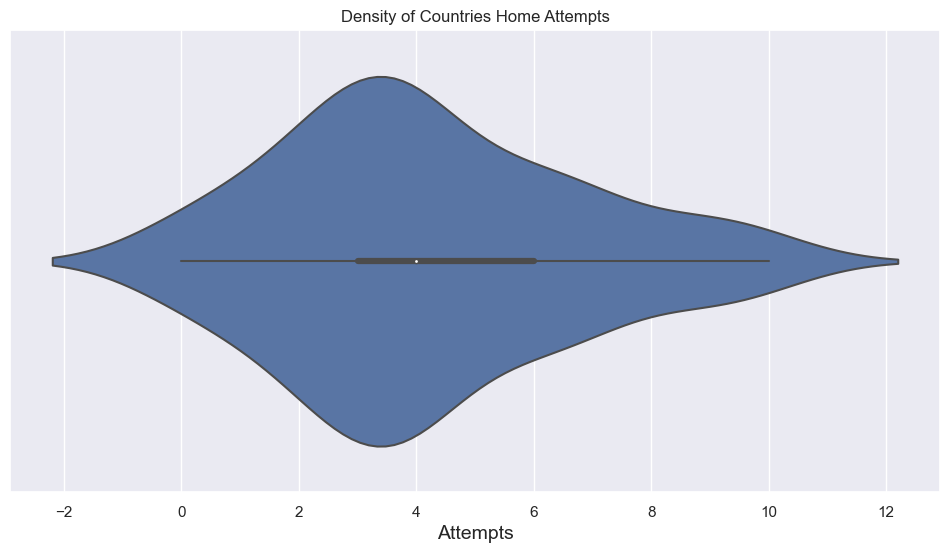

In [21]:
plt.figure(figsize=(12,6))

sns.violinplot(x=world_cup_22['on target attempts team1'])

plt.xlabel("Attempts", fontsize=14)
plt.title("Density of Countries Home Attempts")

Text(0.5, 1.0, 'Density of Countries Away Attempts')

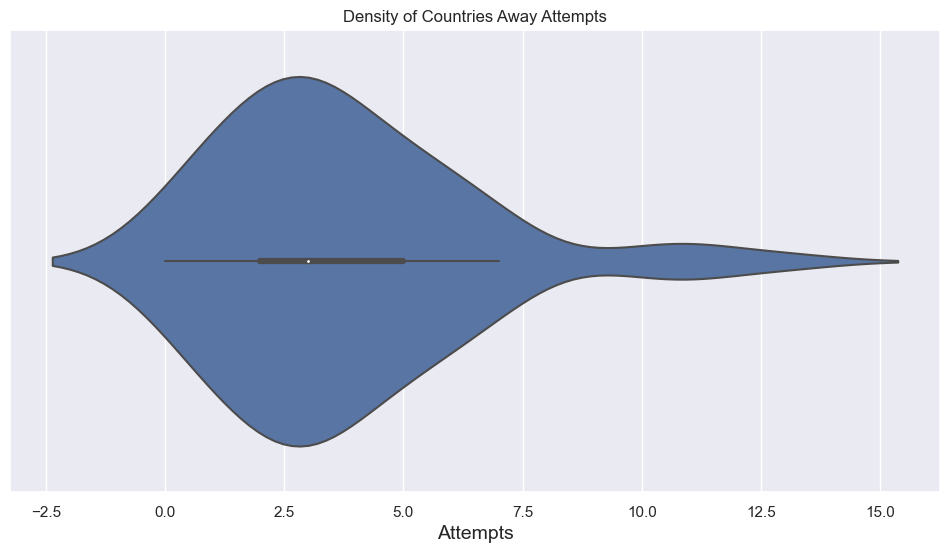

In [20]:
plt.figure(figsize=(12,6))

sns.violinplot(x=world_cup_22['on target attempts team2'])

plt.xlabel("Attempts", fontsize=14)
plt.title("Density of Countries Away Attempts")

Text(0.5, 1.0, 'Density of Countries Home Goals')

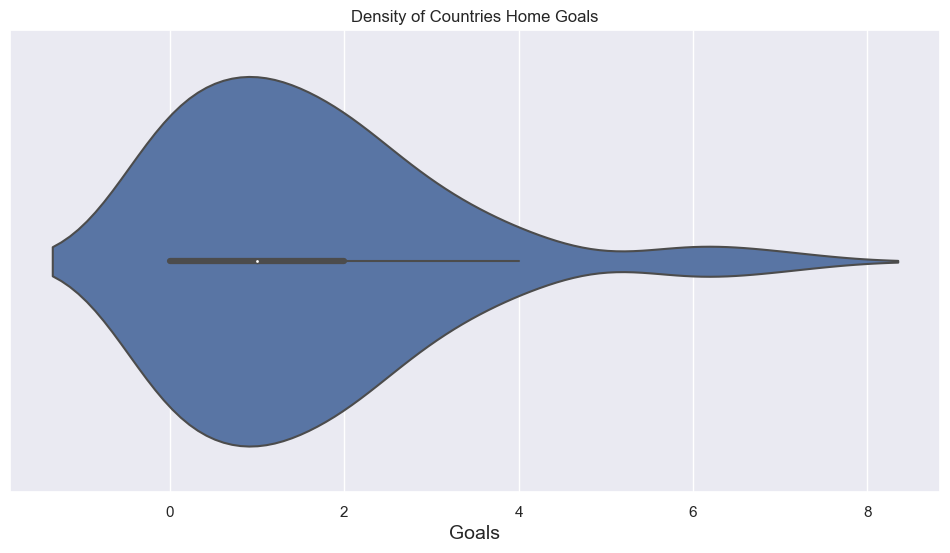

In [19]:
plt.figure(figsize=(12,6))

sns.violinplot(x=world_cup_22['number of goals team1'])

plt.xlabel("Goals", fontsize=14)
plt.title("Density of Countries Home Goals")

Text(0.5, 1.0, 'Density of Countries Away Goals')

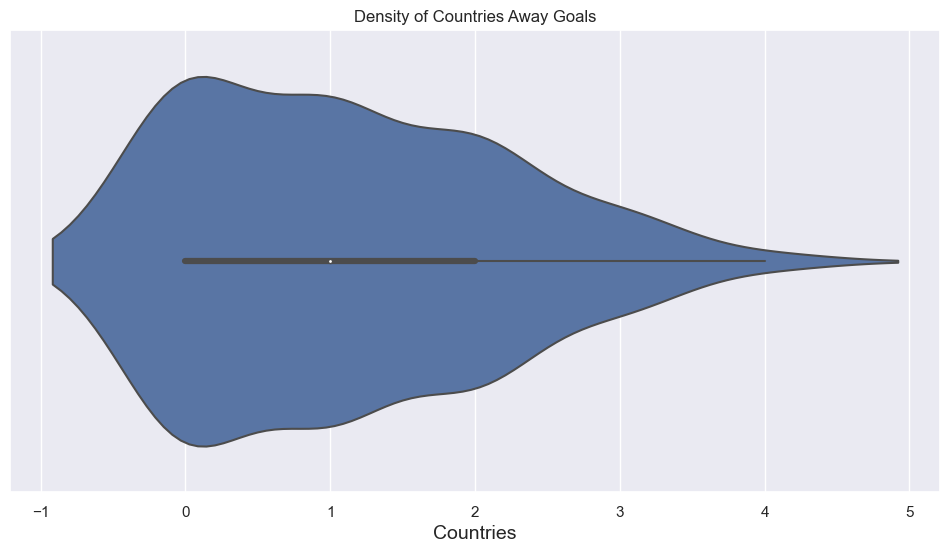

In [15]:
plt.figure(figsize=(12,6))

sns.violinplot(x=world_cup_22['number of goals team2'])

plt.xlabel("Goals", fontsize=14)
plt.title("Density of Countries Away Goals")

Text(0.5, 1.0, 'Home Team Goals')

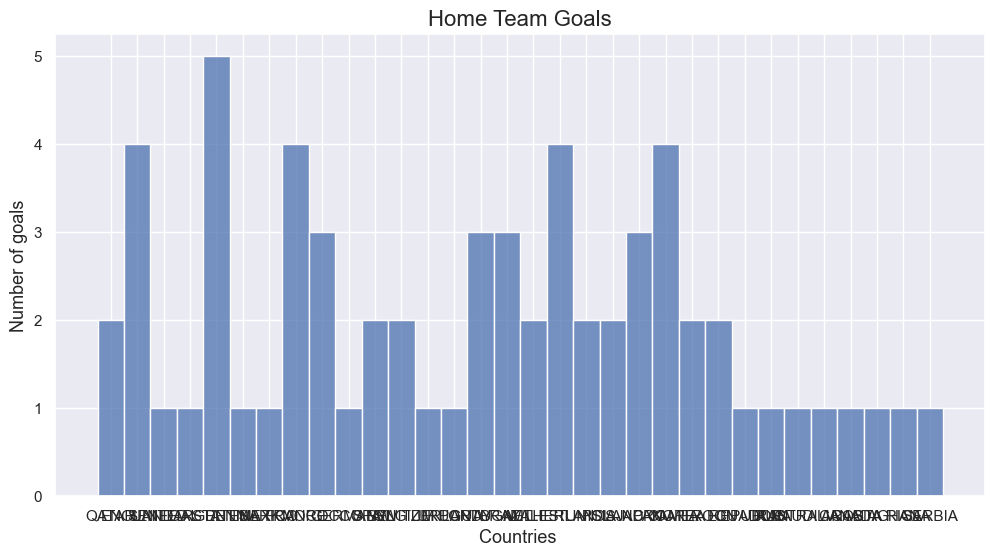

In [25]:
plt.figure(figsize=(12,6))

ax = sns.histplot(data=world_cup_22, x='team1', bins=20)

plt.xlabel("Countries ", fontsize=13)
plt.ylabel("Number of goals", fontsize=13)
plt.title("Home Team Goals", fontsize=16)

Text(0.5, 1.0, 'Away Team Goals')

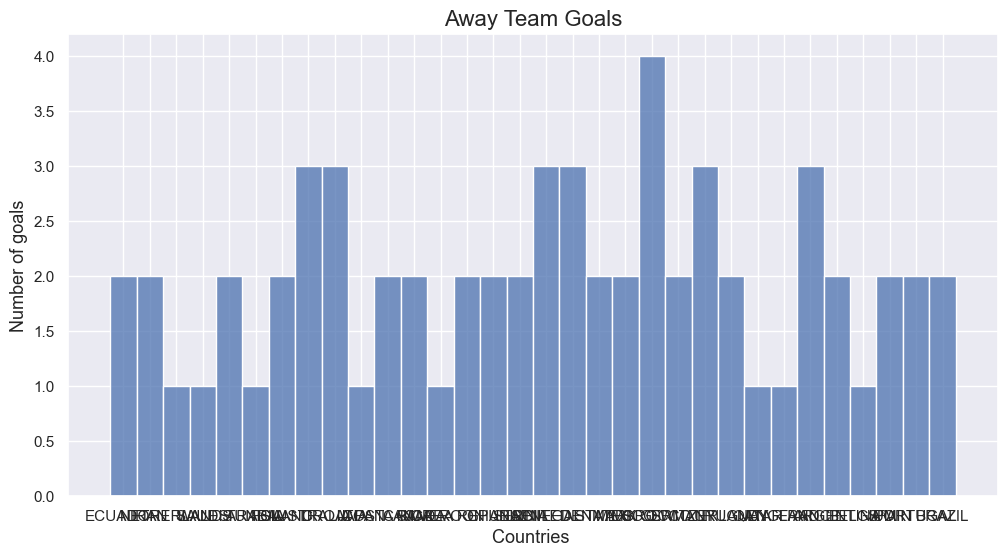

In [24]:
plt.figure(figsize=(12,6))

ax = sns.histplot(data=world_cup_22, x='team2', bins=20)

plt.xlabel("Countries ", fontsize=13)
plt.ylabel("Number of goals", fontsize=13)
plt.title("Away Team Goals", fontsize=16)

In [38]:
world_cup_22['team1'].groupby(world_cup_22['number of goals team1']).describe()

,count,unique,top,freq
number of goals team1,,,,
0,17,15,MOROCCO,2
1,19,19,UNITED STATES,1
2,15,11,FRANCE,2
3,7,6,ARGENTINA,2
4,3,3,FRANCE,1
6,2,2,ENGLAND,1
7,1,1,SPAIN,1


In [39]:
world_cup_22['team2'].groupby(world_cup_22['number of goals team2']).describe()

,count,unique,top,freq
number of goals team2,,,,
0,23,22,CROATIA,2
1,19,16,AUSTRALIA,3
2,15,12,IRAN,2
3,6,6,SENEGAL,1
4,1,1,GERMANY,1


In [45]:
spearmanr(world_cup_22['team1'], world_cup_22['number of goals team1'])

SpearmanrResult(correlation=-0.24193766611912768, pvalue=0.05409511933050627)

In [46]:
spearmanr(world_cup_22['team2'], world_cup_22['number of goals team2'])

SpearmanrResult(correlation=-0.021014122429158375, pvalue=0.8690874238314084)

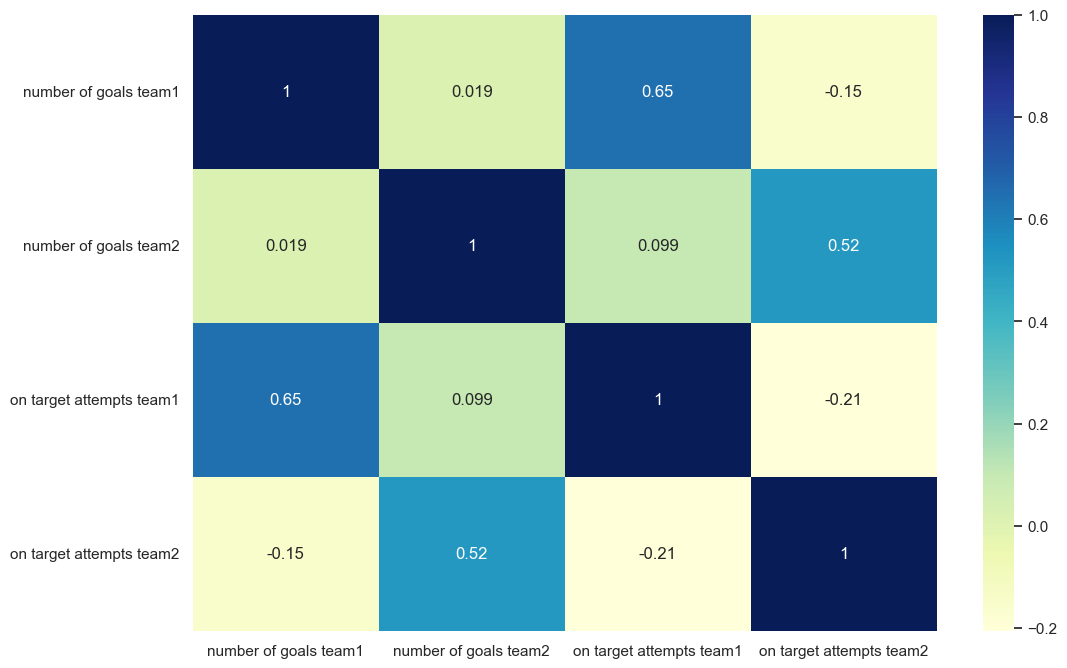

In [47]:
plt.figure(figsize=(12,8))

ax = sns.heatmap(world_cup_22.corr(), annot=True, cmap='YlGnBu')

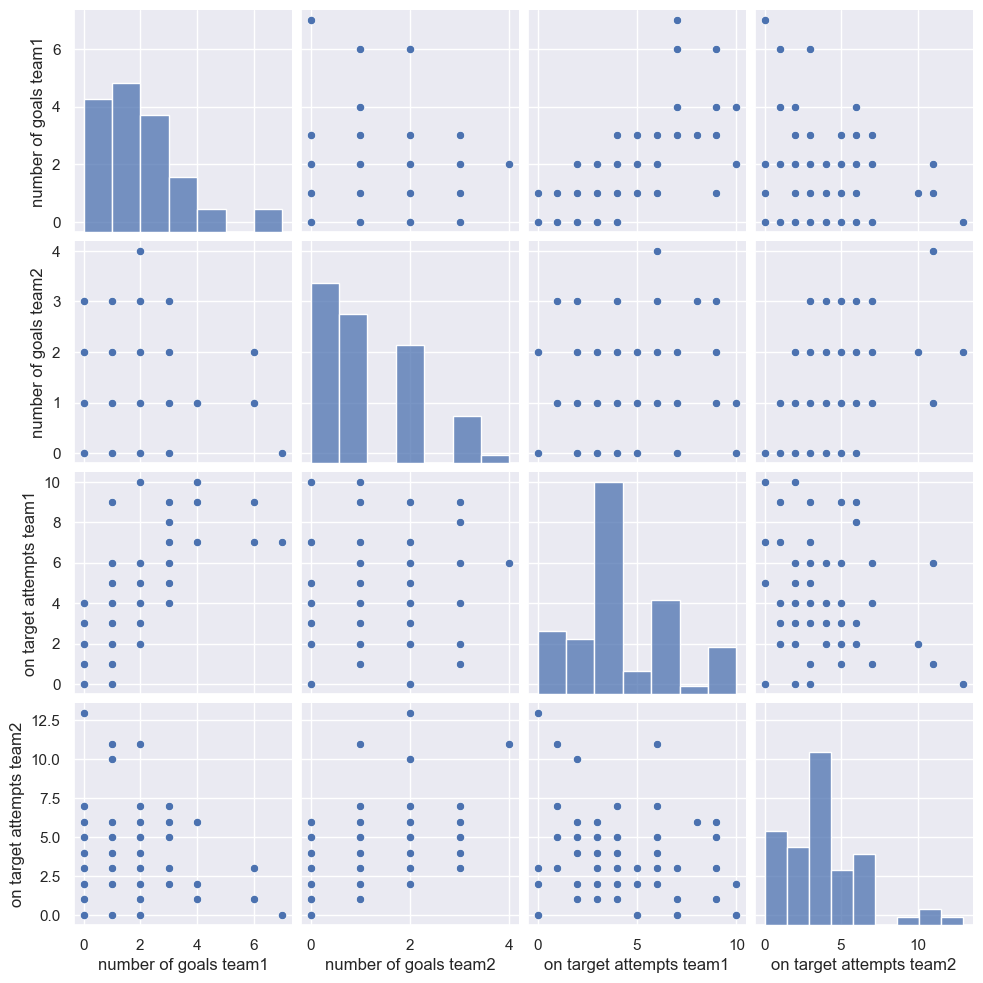

In [51]:
sns.pairplot(world_cup_22)
plt.show()

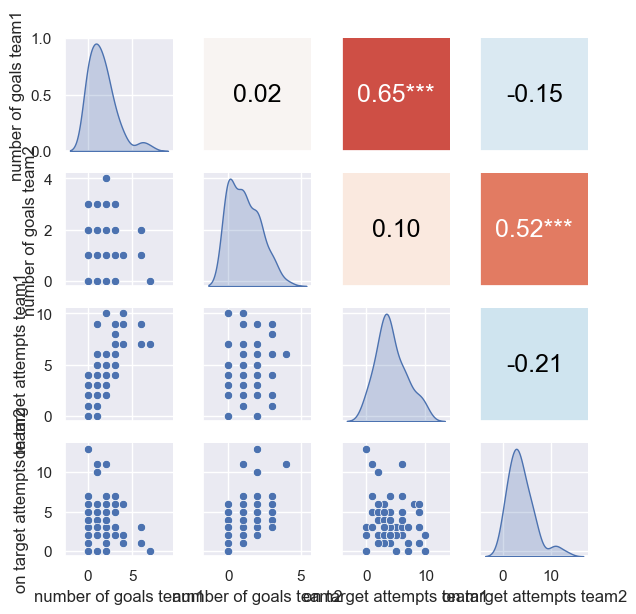

In [52]:
def corrfunc(x, y, **kwargs):
    def pvalue_stars(p):
        if 0.05 >= p > 0.01:
            return '*'
        elif 0.01 >= p > 0.001:
            return '**'
        elif p <= 0.001:
            return '***'
        else:
            return ''
    cmap = kwargs['cmap']
    norm = kwargs['norm']
    ax = plt.gca()
    ax.grid(False)
    r, p = pearsonr(x, y)
    facecolor = cmap(norm(r))
    ax.set_facecolor(facecolor)
    lightness = (max(facecolor[:3]) + min(facecolor[:3])) / 2
    ax.annotate(f"{r:.2f}{pvalue_stars(p)}", xy=(.5, .5), xycoords=ax,
                color='white' if lightness < 0.7 else 'black',
                size=18, ha='center', va='center')



g = sns.PairGrid(world_cup_22, height=1.5, diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot, shade=True)
g.map_upper(corrfunc,
            cmap=plt.get_cmap('RdBu_r'), 
            norm=plt.Normalize(vmin=-1, vmax=1))
g.add_legend()
plt.show()

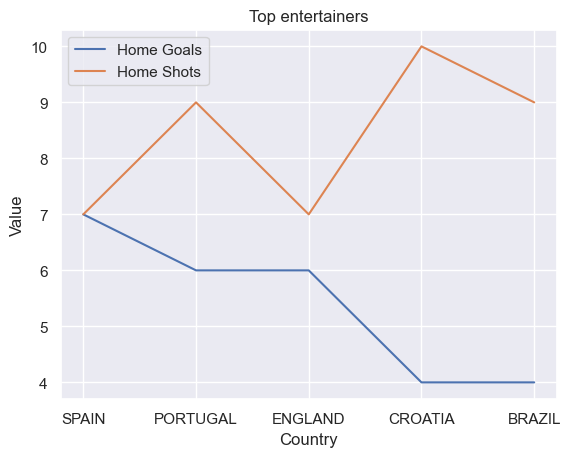

In [58]:
import matplotlib.pyplot as plt

# Sort the DataFrame by multiple columns and select the top 5 rows
top_5 = world_cup_22.sort_values(['number of goals team1', 'on target attempts team1'], ascending=False).head(5)

# Create the line chart with multiple lines
plt.plot(top_5['team1'], top_5['number of goals team1'], label='Home Goals')

plt.plot(top_5['team1'], top_5['on target attempts team1'], label='Home Shots')


# Customize the plot
plt.title('Top entertainers')
plt.xlabel('Country')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

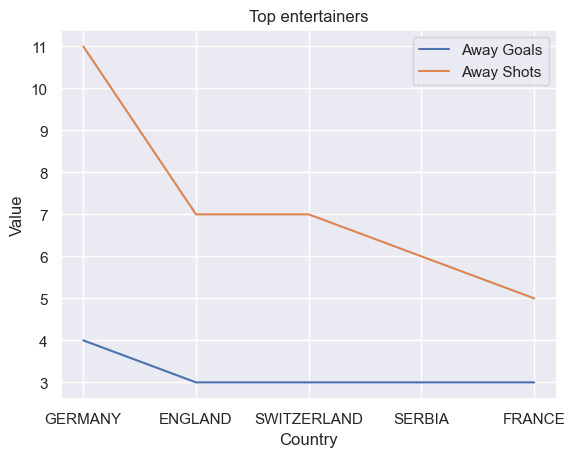

In [59]:
import matplotlib.pyplot as plt

# Sort the DataFrame by multiple columns and select the top 5 rows
top_5 = world_cup_22.sort_values(['number of goals team2', 'on target attempts team2'], ascending=False).head(5)

# Create the line chart with multiple lines

plt.plot(top_5['team2'], top_5['number of goals team2'], label='Away Goals')

plt.plot(top_5['team2'], top_5['on target attempts team2'], label='Away Shots')

# Customize the plot
plt.title('Top entertainers')
plt.xlabel('Country')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

In [64]:
y = world_cup_22['on target attempts team1']
x1 = world_cup_22[['number of goals team1']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     on target attempts team1   R-squared:                       0.417
Model:                                  OLS   Adj. R-squared:                  0.408
Method:                       Least Squares   F-statistic:                     44.34
Date:                      Wed, 31 May 2023   Prob (F-statistic):           8.35e-09
Time:                              10:52:32   Log-Likelihood:                -132.38
No. Observations:                        64   AIC:                             268.8
Df Residuals:                            62   BIC:                             273.1
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.5430      0.348      7.302      0.000       1.847       3.239
number of goals team1     1.0519      0.158      6.659      0.000       0.736       1.368
==============================================================================
Omnibus:                        3.095   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                2.385
Skew:                           0.459   Prob(JB):                        0.303
Kurtosis:                       3.231   Cond. No.                         3.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
y = world_cup_22['on target attempts team2']
x1 = world_cup_22[['number of goals team2']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     on target attempts team2   R-squared:                       0.270
Model:                                  OLS   Adj. R-squared:                  0.258
Method:                       Least Squares   F-statistic:                     22.90
Date:                      Wed, 31 May 2023   Prob (F-statistic):           1.10e-05
Time:                              10:53:07   Log-Likelihood:                -144.15
No. Observations:                        64   AIC:                             292.3
Df Residuals:                            62   BIC:                             296.6
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.2692      0.426      5.331      0.000       1.418       3.120
number of goals team2     1.3348      0.279      4.785      0.000       0.777       1.892
==============================================================================
Omnibus:                       20.765   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.945
Skew:                           1.273   Prob(JB):                     5.18e-07
Kurtosis:                       5.092   Cond. No.                         2.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""